<a href="https://colab.research.google.com/github/manelsaddouki/Project_Security/blob/main/Webscaping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install beautifulsoup4==4.11.2
!pip install lxml==4.9.1
!pip install html5lib==1.1

In [25]:
import pandas as pd
import requests
from bs4 import BeautifulSoup 
import numpy as np

# **A. Web Crawling, HTML parsing and data extraction:**

###**1. Image Extraction: Inflation Rate in Tunisia** 
      

In [26]:
# URL of the website
url = "https://www.donneesmondiales.com/afrique/tunisie/inflation.php"

# Send a GET request to the website
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find the first image tag in the HTML content
img_tag = soup.find_all("img")
img_tag = img_tag[2]
img_tag

<img alt="Taux d'inflation pour les biens de consommation en Tunisie" class="graph" height="200" loading="lazy" src="//cdn.donneesmondiales.com/graphs/inflation/tunesien-930.png" width="930"/>

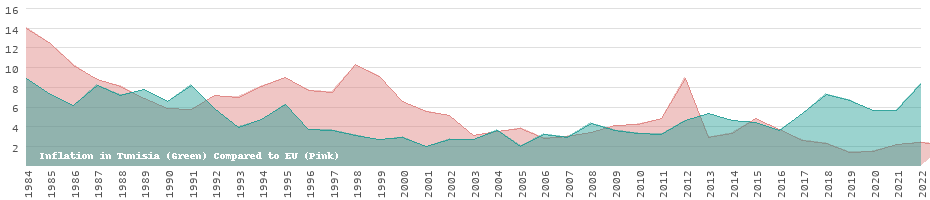

In [27]:
# Get the URL of the image
img_url = img_tag["src"]

# Send a GET request to the image URL
img_response = requests.get("https:" + img_url)
img_response 

# Save the image to a file
with open("image.jpg", "wb") as f:
    f.write(img_response.content)

from PIL import Image, ImageDraw, ImageFont

inflation_image = Image.open('image.jpg')

draw = ImageDraw.Draw(inflation_image)

draw.text((40, 150), "Inflation in Tunisia (Green) Compared to EU (Pink)")
inflation_image.show()

###**2. Text Extraction: Inflation Rate in Tunisia** 

In [ ]:
url = "https://www.zawya.com/en/economy/north-africa/tunisias-inflation-to-accelerate-in-2023-rblwbc4q"

# Send a GET request to the website
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

texts= soup.body.find_all("p")
description= str(texts[1])
description = description.replace('<p>', '')
description = description.replace('</p>', '')

#print('According to Zawya website: \n')
#print(" ".join(description.split()[0:20])) 
#print(" ".join(description.split()[21:37]))
#print(" ".join(description.split()[37:])) 

According to Zawya website: 

Tunisia – Tunisia's inflation will accelerate from 8.3% in 2022 to 9.5% in 2023, mainly due to higher taxes and
food and energy subsidies, according to a commentary published by Fitch Solutions Country Risks &amp; Industry
Research and independent sources.


### **3. Tables Extraction:**

**a.GDP in tunisia (from 2016 to 2021)**

In [2]:
url = "https://www.bct.gov.tn/bct/siteprod/tableau_n.jsp?params=PL150010"

data  = requests.get(url).text

In [3]:
soup = BeautifulSoup(data, 'html5lib')

In [4]:
tables = soup.find_all('table')

In [ ]:
print(tables[1].prettify())

In [ ]:
PIB_data = pd.DataFrame(columns=["D2016", "D2017", "D2018", "D2019", "D2020", "D2021"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in tables[1].thead.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
      D2016 = col[0].text.strip()
      D2017 = col[1].text.strip()
      D2018 = col[2].text.strip()
      D2019 = col[3].text.strip()
      D2020 = col[4].text.strip()
      D2021 = col[5].text.strip()
    
    # Finally we append the data of each row to the table
    PIB_data = PIB_data.append({"D2016": 2016, "D2017":2017 , "D2018": 2018, "D2019": 2019, "D2020": 2020, "D2021": 2021}, ignore_index=True)    


In [ ]:
#print(PIB_data.head())

In [7]:
read_html_pandas_data = pd.read_html(url)

In [8]:
read_html_pandas_data = pd.read_html(str(soup))

In [9]:
PIB_df = pd.read_html(str(tables[1]), flavor='bs4')[0]
PIB_df = PIB_df.dropna()

PIB_df

,Indicateurs,2016,2017,2018,2019,2020,2021
1,Produit intérieur Brut aux prix constants de l...,908057.0,974254.0,1046549.0,1146840.0,1123670.0,1248058.0
2,PIB hors agriculture et pêche,831717.0,888261.0,949463.0,1028415.0,1003289.0,1126979.0
3,Valeur ajoutée de l'agriculture et pêche,76340.0,85993.0,97086.0,118425.0,120381.0,121079.0
4,Produit intérieur Brut aux prix courants,952869.0,1020115.0,1129855.0,1229693.0,1196334.0,1304661.0
5,Déflateur du PIB (accroissement en %),49.0,47.0,80.0,72.0,65.0,45.0
6,RNDB par habitant(en dinars),86184.0,91506.0,100173.0,108379.0,104519.0,115682.0
7,RNDB par habitant(en dollars),40138.0,37820.0,37847.0,36950.0,37181.0,41370.0
8,Revenu National Disponible Brut(RNDB),973261.0,1044834.0,1155203.0,1261320.0,1225610.0,1363160.0
9,Consommation nationale totale,857840.0,929050.0,1016155.0,1114452.0,1143815.0,1237301.0
10,Consommation publique,178370.0,195092.0,207758.0,231385.0,258547.0,273696.0


### **b.Performance of the private sector (2011-2019)**

In [10]:
INS_url1 = "http://www.ins.tn/statistiques/93"

INS_data1  = requests.get(INS_url1).text

In [11]:
soup1 = BeautifulSoup(INS_data1, 'html5lib')

In [12]:
tables1 = soup1.find_all('table')

In [ ]:
print(tables1[0].prettify())

In [13]:
INS_data1 = pd.DataFrame(columns=["D2016", "D2017", "D2018", "D2019"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in tables1[0].thead.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
      D2016 = col[3].text.strip()
      D2017 = col[4].text.strip()
      D2018 = col[5].text.strip()
      D2019 = col[6].text.strip()
    
    # Finally we append the data of each row to the table
    INS_data1 = INS_data1.append({"D2016": 2016, "D2017":2017 , "D2018": 2018, "D2019": 2019}, ignore_index=True)    


<ipython-input-13-ce33b6d28851>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  INS_data1 = INS_data1.append({"D2016": 2016, "D2017":2017 , "D2018": 2018, "D2019": 2019}, ignore_index=True)


In [ ]:
#print(INS_data1.head())

  D2016 D2017 D2018 D2019
0  2016  2017  2018  2019


In [14]:
read_html1 = pd.read_html(INS_url1)

In [15]:
read_html1 = pd.read_html(str(soup1))

In [16]:
INS_df = pd.read_html(str(tables1[0]), flavor='bs4')[0]
INS_df  = INS_df.dropna()

INS_df

,Unnamed: 0,2011,2012,2013,2014,2015,2016,2017,2018,2019
6,Secteur d'activité,602222.0,626102.0,654524.0,680241.0,711442.0,740054.0,771032.0,735043.0,782115.0
7,"Agriculture, Sylviculture et Pêche",2563.0,2695.0,2915.0,3134.0,3346.0,3586.0,4098.0,4634.0,5310.0
8,Industrie,70871.0,72961.0,76365.0,79250.0,82295.0,85077.0,88173.0,84283.0,89190.0
9,Construction,27713.0,29730.0,32458.0,34771.0,37393.0,39812.0,41880.0,41038.0,43077.0
10,"Commerce, réparation d’automobiles et de motoc...",256298.0,264634.0,275948.0,285959.0,299959.0,311887.0,324036.0,343951.0,364727.0
11,Transports et Entreposage,93956.0,99253.0,101590.0,103690.0,105773.0,107753.0,110211.0,103025.0,107360.0
12,Hébergement et Restauration,28256.0,29698.0,31493.0,33503.0,35761.0,38031.0,40778.0,40481.0,43832.0
13,Information et communication,15284.0,15255.0,15482.0,15492.0,15661.0,15796.0,16077.0,14623.0,15684.0
14,Activités financières et d'assurances,1616.0,1685.0,1754.0,1825.0,1901.0,1940.0,2012.0,2023.0,2200.0
15,Activités immobilières,3470.0,3670.0,3959.0,4207.0,4465.0,4715.0,4988.0,5003.0,5332.0


### **c.unemployment rate in Tunisia (2018-2020)**

In [18]:
INS_url2 = "http://www.ins.tn/statistiques/153"

INS_data2  = requests.get(INS_url2).text

In [19]:
soup2 = BeautifulSoup(INS_data2, 'html5lib')
tables2 = soup2.find_all('table')
#print(tables2[0].prettify())

In [20]:
INS_data2 = pd.DataFrame(columns=["D2018_4", "D2019_1", "D2019_2", "D2019_3", "D2019_4", "D2020_1", "D2020_2", "D2020_3"])

# First we isolate the body of the table which contains all the information
# Then we loop through each row and find all the column values for each row
for row in tables2[0].thead.find_all("tr"):
    col = row.find_all("td")
    if (col != []):
      D2018_4 = col[0].text.strip()
      D2019_1 = col[1].text.strip()
      D2019_2 = col[2].text.strip()
      D2019_3 = col[3].text.strip()
      D2019_4 = col[4].text.strip()
      D2020_1 = col[5].text.strip()
      D2020_2 = col[6].text.strip()
      D2020_3 = col[7].text.strip()
    
    # Finally we append the data of each row to the table
    INS_data2 = INS_data2.append({"D2018_4": "Quatrième-trimestre 2018", "D2019_1": "Première-trimestre 2019" , "D2019_2": "Deuxième-trimestre 2019", "D2019_3": "Troisième-trimestre 2019", "D2019_4": "Quatrième-trimestre 2019", "D2020_1": "Première-trimestre 2020", "D2020_2": "Deuxième-trimestre 2020", "D2020_3": "Troisième-trimestre 2020"}, ignore_index=True)    


<ipython-input-20-a01091df1b0b>:18: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  INS_data2 = INS_data2.append({"D2018_4": "Quatrième-trimestre 2018", "D2019_1": "Première-trimestre 2019" , "D2019_2": "Deuxième-trimestre 2019", "D2019_3": "Troisième-trimestre 2019", "D2019_4": "Quatrième-trimestre 2019", "D2020_1": "Première-trimestre 2020", "D2020_2": "Deuxième-trimestre 2020", "D2020_3": "Troisième-trimestre 2020"}, ignore_index=True)


In [ ]:
#print(INS_data2.head())

In [21]:
read_html2 = pd.read_html(INS_url2)
read_html2 = pd.read_html(str(soup2))
INS_df2 = pd.read_html(str(tables2[0]), flavor='bs4')[0]
INS_df2  = INS_df2.dropna()

INS_df2

,Unnamed: 0,quatrième-trimestre 2018,première-trimestre 2019,deuxième-trimestre 2019,troisième-trimestre 2019,quatrième-trimestre 2019,première-trimestre 2020,deuxième-trimestre 2020,troisième-trimestre 2020
6,Evolution de la population active en chômage,644.9,637.7,634.9,628.3,623.9,634.8,746.4,676.6
7,Masculin,370.4,366.1,365.4,362.5,360.2,366.0,449.3,402.1
8,Féminin,274.5,271.6,269.5,265.8,263.7,268.7,297.1,274.5


**d. Save my data in a file:**

In [22]:
# Create a Pandas Excel writer using the openpyxl engine
writer = pd.ExcelWriter('tables.xlsx', engine='openpyxl')

# Write each table to a specific sheet in the Excel file
PIB_df.to_excel(writer, sheet_name='GDP', index=False)
INS_df.to_excel(writer, sheet_name='Private Sector', index=False)
INS_df2.to_excel(writer, sheet_name='Unemployment', index=False)

# Save the file
writer.save()

<ipython-input-22-871353338a58>:10: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()


# B. Data Visualization: 

This part provides a comprehensive analysis of Tunisia's economic situation, focusing on 5 main economic indicators: Gross Domestic Product (GDP), Inflation rate, Private sector performance, unemployment, and unemployment per gender. The data for our analysis is obtained through a sophisticated web scraping tool developed for the purpose of this analysis.
This analysis tries to present a thorough view of Tunisia's current economic position, which may be useful for policymakers, investors, and scholars alike.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

###**1. GDP:** 

Gross Domestic Product (GDP): GDP is a broad measure of total domestic output that reflects the country's economic health and level of life. It aids in understanding the size and direction of Tunisia's economy.

In [23]:
PIB = PIB_df.head(1)
float(PIB['2021'])

1248058.0

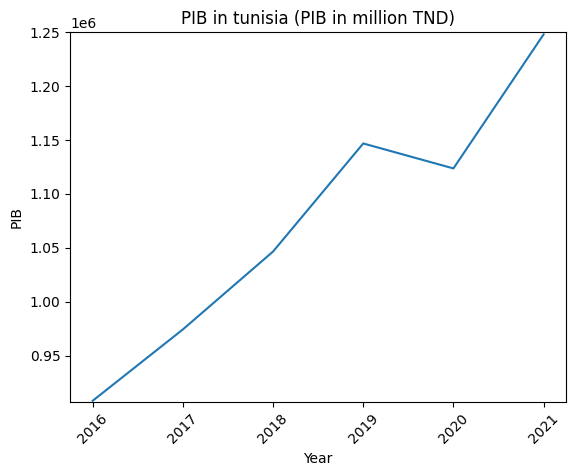

In [ ]:
fig,ax = plt.subplots()
plt.title('PIB in tunisia (PIB in million TND)')
plt.ylabel('PIB')
plt.xlabel('Year')
ax.xaxis.set_tick_params(labelsize=10)
x= ['2016', '2017', '2018', '2019', '2020', '2021' ]
y= [float(PIB['2016']), float(PIB['2017']), float(PIB['2018']), float(PIB['2019']), float(PIB['2020']), float(PIB['2021'])]
ax.plot(x,y)
ax.tick_params(axis='x', rotation=45)
plt.ylim(907000, 1250000)

plt.show() 

According to the data provided by the Central Bank of Tunisia (2016-2021), the Tunisian GDP has increased from 0.9 million TND  in 2016 to 1.25 million TND. We notice an interruption to the linear growth between 2019-2020 resulting in a negative growth of the GDP. This downturn is explained by the COVID-19 global pandemic that crippled the global economy including the Tunisian economy significantly.
Standalone, the nominal GDP indicates growth in the Tunisian economy. However, this indicator must be analyzed in comparison to the total expenditure of the country in this specific period and also the inflation rate that reflects the real GDP which is the GDP adjusted to inflation.

###**2. Inflation rates:**

Inflation rate: it provides insight into the country's economic stability by demonstrating how prices are changing and influencing the population's purchasing power.

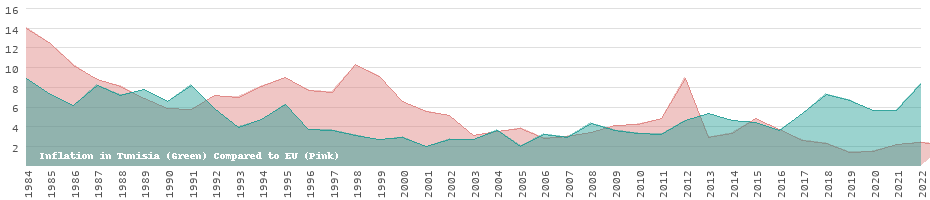

In [ ]:
draw.text((40, 150), "Inflation in Tunisia (Green) Compared to EU (Pink)")
inflation_image.show()

In [ ]:
print('According to Zawya website: \n')
print(" ".join(description.split()[0:20])) 
print(" ".join(description.split()[21:37]))
print(" ".join(description.split()[37:])) 

According to Zawya website: 

Tunisia – Tunisia's inflation will accelerate from 8.3% in 2022 to 9.5% in 2023, mainly due to higher taxes and
food and energy subsidies, according to a commentary published by Fitch Solutions Country Risks &amp; Industry
Research and independent sources.


In our analysis of the inflation rate, we compared the Tunisian inflation rate (Green) to the European Union (EU) inflation rate (Green). The importance of this comparison resides in the strong ties of the Tunisian economy with the EU in terms of the import and export of goods and the determination of their prices in the Tunisian markets. 
Historical data are provided by Données Mondiales and Zawya website over the period of 1984-2022. We can notice from the chart that Tunisian inflation has been almost always lower the EU level of inflation during the period 1984-2016 except for short periods of 1 or 2 years maximum with an average of 1.5% difference. However, after 2016, we notice huge increase in the Tunisian inflation and a relative decrease in the EU inflation creating a significant difference of 8%. This disparity reflects a downturn in the Tunisian economy in the past years as the inflation has increased which results in a decrease in the purchasing power that can lead to social and political unstability in the country. 

###**3.Private Sector Performance:**

Private sector performance: This metric represents how companies, particularly small and medium-sized firms in the different economic sectors, contribute to the economy, create jobs, and drive innovation.  

In [ ]:
Private_sector= INS_df.iloc[:,[0,9]]
Private_sector = Private_sector.sort_values('2019', ascending=False)
#Private_sector= Private_sector.transpose() 
x= Private_sector['Unnamed: 0']
y= Private_sector['2019']

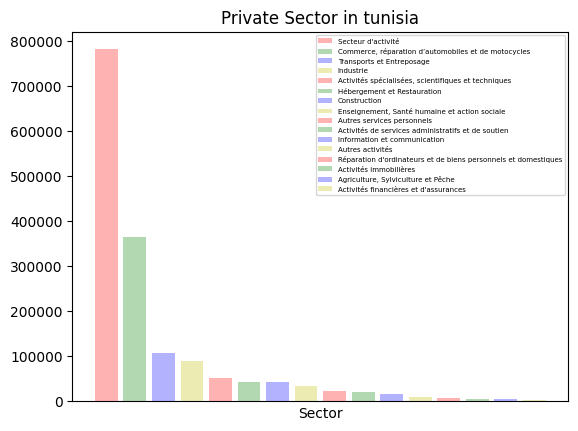

In [ ]:
# Creating the bar chart
colors = ['r', 'g', 'b', 'y']
fig2,ax = plt.subplots()
plt.bar(x, y, label=x, color=colors, alpha=0.3)

# Adding labels to the chart
plt.title("Private Sector in tunisia")
plt.xlabel("Sector")
plt.legend()
plt.xticks([])
plt.legend(loc='upper right', fontsize=5) 

# Displaying the chart
plt.show()

Data for this metric is obtained from the Tunisian Statistics Institute (INS) reflecting the number of private companies per sector for the year 2019. From all sectors, we can notice that there are two dominant fields where private companies are concentrated: Services and Automotives (Reparations and retail) with numbers of almost 800,000 and 380,000 companies respectively.
This dominance should shift the attention of Tunisian policymakers and investors to focus on these sectors and help them grow. However, the small numbers of companies in the other sectors presented on the graph reflect the negligence of such sectors and that they should be encouraged to help diversify the economic income sources and help the economy in terms of GDP.

###**4.Unemploymenr Rate:** 

**a.Unemployment:** it shows the proportion of the labor force that is unemployed and actively looking for work. High unemployment may signify an economic downturn, whilst low unemployment may suggest a thriving economy.

In [ ]:
chomage=INS_df2.head(1)
chomage

,Unnamed: 0,quatrième-trimestre 2018,première-trimestre 2019,deuxième-trimestre 2019,troisième-trimestre 2019,quatrième-trimestre 2019,première-trimestre 2020,deuxième-trimestre 2020,troisième-trimestre 2020
6,Evolution de la population active en chômage,644.9,637.7,634.9,628.3,623.9,634.8,746.4,676.6


<Figure size 800x600 with 0 Axes>

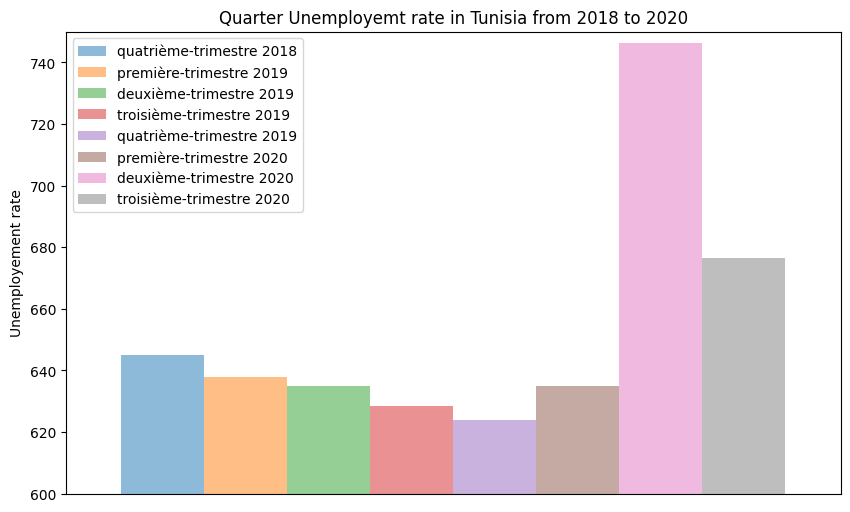

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure(figsize=(8, 6))
chomage.plot(kind='bar', figsize=(10, 6), width=3 ,align='center', alpha=0.5)

plt.xticks([])
plt.ylabel('Unemployement rate') # add y-label to the plot
plt.title('Quarter Unemployemt rate in Tunisia from 2018 to 2020') # add title to the plot
plt.ylim(600, 750)
plt.show()

plt.savefig('plot.png', dpi=300, bbox_inches='tight')

According to the data provided by the Tunisian Statistics Institute (INS) from 2018 to 2020, the unemployment rate has raised over these years. We can notice firstly a downward slope from the end of 2018 towards the end of 2019. However, we notice a slight increase in the first quarter of 2020 followed by a skyrocketing rate in the subsequent quarter. This is explained by the COVID-19 global pandemic where many people were laid off from their jobs due to the global economic crisis that affected Tunisia. Toward the third quarter of 2020, the rate decreased as the pandemic loosened up yet it stayed higher than previous years.

**b.Unemployment by Gender:** Unemployment by Gender gives information on Tunisia's job market's equity and inclusion. It is a critical metric for assessing gender differences in the labor market and comprehending the social elements of unemployment.

In [ ]:
chomage_sex= INS_df2.iloc[[1,2], [0,8]]
chomage_sex

,Unnamed: 0,troisième-trimestre 2020
7,Masculin,402.1
8,Féminin,274.5


In [ ]:
chomage_sex["troisième-trimestre 2020"]

7    402.1
8    274.5
Name: troisième-trimestre 2020, dtype: float64

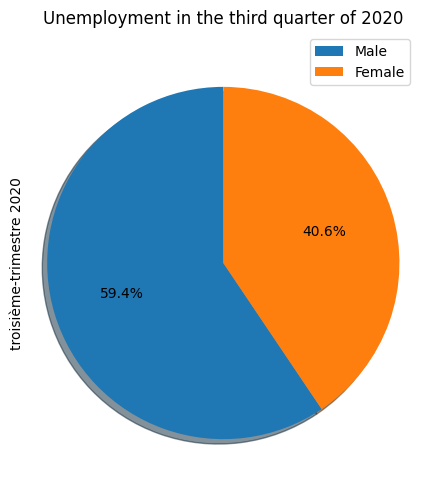

In [ ]:
chomage_sex['troisième-trimestre 2020'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° 
                            shadow=True,        # add shadow  
                            labels=None,         # turn off labels on pie chart 
                            )

plt.title('Unemployment in the third quarter of 2020')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.legend(labels=['Male', 'Female'], loc='upper right') 

plt.show()

As for our last indicator, we extracted data comparing male and female percentages from the unemployed population to tackle the issue of inclusion and equity in the Tunisian economy.
Through the most recent data of 2020 provided by INS, Male unemployment is almost 20% higher than female unemployment. Although this data might indicate that more women are employed and kept their jobs in 2020, more insight on women's employability percentage from the overall women population in Tunisia can help us understand more the position of women in pushing the economy.


# **Conclusion for our analysis:**



Based on the entire research, we can conclude that Tunisia's economic status is mixed. While GDP growth signals economic prosperity, high inflation, rising unemployment, and gender disparities in the job market all pose challenges to the labor market's stability and inclusion.

Based on the previous analysis, some recommendations should be considered: 


1. Policymakers should enact strategies to diversify the private sector, stabilize inflation, and address unemployment through job creation initiatives.
2. Policymakers need to focus on reducing gender disparity in the job market through equality-promoting measures.
3. Investors should explore opportunities in non-dominant sectors, while closely monitoring inflation and unemployment trends.
4. Both policymakers and investors must prioritize risk assessment and due diligence given Tunisia's current economic climate.
